# **Data Loading**


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y=data.target #resultat

# **Data Engineering**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42) # RSs: changer l'ordre de présentation  des données afin de s'approcher de la généralisation
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 30)
(427, 30)
(142,)
(427,)


# **Predictive Analysis (Model)**

## One NN

* Méthode **sklearn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)
#print(neigh.predict_proba([[0.9]]))


[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  1  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0  1  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0
  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0 -1  0  0  1  0  0 -1  0  1
  0  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1
  0  0  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0

* Méthode from **scratch**

In [ ]:
import numpy as np

class oneNN:
  def _init_(self):
    self.X_train = None
    self.y_train= None
  def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
  def predict(self, X_test):
    y_pred= np.zeros(X_test.shape[0])
    for i in range (X_test.shape[0]):
      #Calculate the distances between the test point and all the training points
       distances = [self.euclidean_distance(X_test[i], x) for x in self.X_train]

      # Find the training point with the smallest distance
       min_distance=min(distances)
       min_index= distances.index(min_distance)

      # Predict the label of the test point based on the label of the nearest training point
       y_pred[i]= self.y_train[min_index]

    return y_pred

  def euclidean_distance(self, x1, x2):
      return np.sqrt(np.sum((x1 - x2) ** 2))


In [ ]:
neigh = oneNN()
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)

## KNN

* Méthode Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)
#print(neigh.predict_proba([[0.9]]))

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0 -1  0  0  0  1  0
  0  0  0  0 -1  0  0  0  0  0  1  0  0  0  0 -1  0  0  1  0  0 -1  0  1
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1
  0  0  0  0 -1  1  1  0  0  0  0  0  0  0  0  0  0

* Méthode from Scratch

In [ ]:
import numpy as np

class KNN :
  def __init__(self, k):
    self.k=k
    self.X_train = None
    self.y_train= None
  def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
  def predict(self, X_test):
    y_pred= np.zeros(X_test.shape[0])
    for i in range (X_test.shape[0]):
      #Calculate the distances between the test point and all the training points
       distances = [self.euclidean_distance(X_test[i], x) for x in self.X_train]

      # Find the k nearest training points
       k_nearest_indices=np.argsort(distances)[:self.k]

      # get the labels of the k nearest training points
       k_nearest_labels=[self.y_train[i] for i in k_nearest_indices]

      # Predict the laabel of the test point based on the majority vote of the k nearest training points
       y_pred[i]= majority_vote(k_nearest_labels)

    return y_pred

  def euclidean_distance(self, x1, x2):
      return np.sqrt(np.sum((x1 - x2) ** 2))

def majority_vote(labels):
    unique_labels, counts= np.unique(labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

In [ ]:
neigh =KNN(3)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)

# **Manhattan Distance**

In [ ]:
"""import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            # Calculate the distances between the test point and all the training points
            distances = [self.manhattan_distance(X_test[i], x) for x in self.X_train]

            # Find the k nearest training points
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest training points
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

            # Predict the label of the test point based on the majority vote of the k nearest training points
            y_pred[i] = self.majority_vote(k_nearest_labels)

        return y_pred

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def majority_vote(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        return unique_labels[np.argmax(counts)]

# Example usage:
neigh =KNN(3)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)


SyntaxError: incomplete input (<ipython-input-9-21bbff702c33>, line 1)

# **KNN with distance type parameter**

In [ ]:
"""class KNN:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            # Calculate the distances between the test point and all the training points
            if self.distance_metric == 'euclidean':
                distances = [self.euclidean_distance(X_test[i], x) for x in self.X_train]
            elif self.distance_metric == 'manhattan':
                distances = [self.manhattan_distance(X_test[i], x) for x in self.X_train]
            else:
                raise ValueError("Invalid distance metric. Choose either 'euclidean' or 'manhattan'.")

            # Find the k nearest training points
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest training points
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

            # Predict the label of the test point based on the majority vote of the k nearest training points
            y_pred[i] = self.majority_vote(k_nearest_labels)

        return y_pred

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def majority_vote(self, labels):
        unique_labels, counts = np.unique(labels, return_counts=True)
        return unique_labels[np.argmax(counts)]

# Example usage:
c = input('Choose your distance type (euclidean/manhattan): ')
knn = KNN(k=3, distance_metric=c)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_test - y_pred)

# **KNN with Weighted vote**

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            # Calculate the distances between the test point and all the training points
            distances = [self.euclidean_distance(X_test[i], x) for x in self.X_train]

            # Find the k nearest training points
            k_nearest_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest training points
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

            # Calculate weights based on inverse distance
            weights = [1 / d for d in distances[:self.k]]

            # Predict the label of the test point based on the weighted votes
            y_pred[i] = self.weighted_vote(k_nearest_labels, weights)

        return y_pred

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def weighted_vote(self, labels, weights):
        unique_labels = np.unique(labels)
        weighted_votes = {label: 0 for label in unique_labels}
        for label, weight in zip(labels, weights):
            weighted_votes[label] += weight
        return max(weighted_votes, key=weighted_votes.get)
# Example usage:
neigh =KNN(7)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(y_test-y_pred)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
 -1.  0.  0.  0.  1.  0.  0.  0.  0.  0. -1.  0.  0

# **Nearest Centroid Classifier**

* from sklearn

In [ ]:
"""from sklearn.neighbors import NearestCentroid
import numpy as np
centroid_classifier = NearestCentroid()
centroid_classifier.fit(X_train, y_train)
y_pred = centroid_classifier.predict(X_test)
print(y_test-y_pred)

* from scratch

In [ ]:
"""import numpy as np

class NearestCentroidClassifier:
    def __init__(self):
        self.centroids = None

    def fit(self, X_train, y_train):
        unique_classes = np.unique(y_train)
        self.centroids = {}
        for class_ in unique_classes:
            class_indices = np.where(y_train == class_)[0]
            class_data = X_train[class_indices]
            centroid = np.mean(class_data, axis=0)
            self.centroids[class_] = centroid

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            distances = [self.euclidean_distance(X_test[i], centroid) for centroid in self.centroids.values()]
            nearest_centroid_index = np.argmin(distances)
            y_pred[i] = list(self.centroids.keys())[nearest_centroid_index]
        return y_pred

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

# Example usage:
nc_classifier = NearestCentroidClassifier()
nc_classifier.fit(X_train, y_train)
y_pred = nc_classifier.predict(X_test)
print(y_test-y_pred)


# **Performance Analysis and Evaluation**


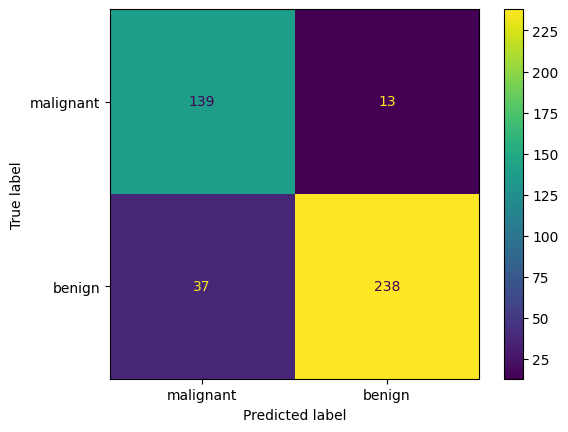

1.0
              precision    recall  f1-score   support

   malignant       0.79      0.91      0.85       152
      benign       0.95      0.87      0.90       275

    accuracy                           0.88       427
   macro avg       0.87      0.89      0.88       427
weighted avg       0.89      0.88      0.88       427



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import top_k_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

cm=confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()
print(top_k_accuracy_score(y_test, y_pred, k=2))
print(classification_report(y_test,y_pred,target_names=data.target_names))

# **Descriptive Analysis (Model)**

* From Sklearn:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans

# Suppression du label:
del y
# Créer et entraîner le modèle de clustering K-Means
k = 2  # Nombre de clusters désiré
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Prédire les clusters pour les données
labels = kmeans.predict(X)

# Afficher les étiquettes des clusters prédites
print("Labels des clusters prédits :")
print(labels)

# Afficher les centres des clusters
print("\nCentres des clusters :")
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels des clusters prédits :
[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

* From Scratch:

In [ ]:
import numpy as np
# Fonction pour initialiser les centroids aléatoirement
def initialize_centroids(X, k):
    centroids_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroids_indices]
    return centroids

# Fonction pour affecter chaque point à son centroid le plus proche
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Fonction pour mettre à jour les centroids
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

# Implémentation de l'algorithme K-Means
def kmeans(X, k, max_iter=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Nombre de clusters désiré
k = 2

# Appliquer K-Means
labels, centroids = kmeans(X, k)

# Afficher les étiquettes des clusters prédites
print("Labels des clusters prédits :")
print(labels)

# Afficher les centres des clusters
print("\nCentres des clusters :")
print(centroids)

Labels des clusters prédits :
[0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1

* Performance analysis & evaluation:

1.   Validation:




In [ ]:
 from sklearn.metrics import davies_bouldin_score
 dbi = davies_bouldin_score(X, labels)
 print(dbi)

0.5044035685410985


2.   Consistence:



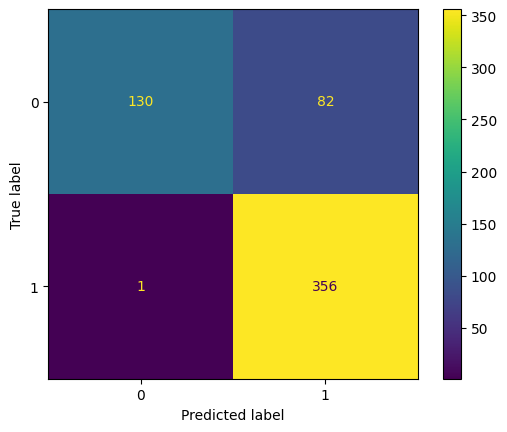

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display
import matplotlib.pyplot as plt

y=data.target
cluster_labels = np.unique(labels)

contingency_matrix = ConfusionMatrixDisplay(confusion_matrix(y,labels), display_labels=cluster_labels)
contingency_matrix.plot()
plt.show()

In [ ]:
from sklearn.metrics import homogeneity_completeness_v_measure
print('Homogeneity = ', homogeneity_completeness_v_measure(y, labels)[0])
print('Completeness = ', homogeneity_completeness_v_measure(y, labels)[1])
print('V-measure = ', homogeneity_completeness_v_measure(y, labels)[2])

Homogeneity =  0.42229071246999117
Completeness =  0.5168089972809706
V-measure =  0.46479332792160793
